#### To perform EDA of the Titanic Dataset, the following steps were undertaken.
- Importing the relevant libraries.
- Examining the dataset(Identifying it's shape, datatypes, variables and values inside)
- Consolidating the requisite info in a data dictionary 
- Performed univariate analysis for all variables
- Performed bivariate analysis to identify patterns between variables
- Performed multivariate analysis to identify correlations between variables
- Cleaning the dataset, to take care of missing values in the requisite columns.
- Scaling the normalized variable
- Identified the number of clusters required
- Performed K means clustering to form clusters for the column in which it was performed. 

# Importing libraries and loading the dataset

In [124]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
%matplotlib inline

In [128]:
#Displaying the head of the dataset for preliminary analysis
df=pd.read_csv(r'C:\Users\allen\OneDrive\Documents\titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
#setting the index to PassengerId
df=df.set_index('PassengerId')



# Inspecting the Dataset 

In [130]:
#Getting the shape of the dataset
df.shape

(891, 11)

This indicates there are 891 rows and 11 columns

In [131]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
#Getting the informartion of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [66]:
#Getting a description of the DataFrame
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='PassengerId'>

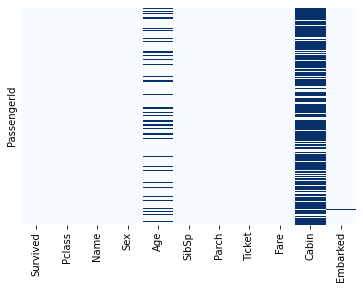

In [67]:
#Getting a heatmap of the missing values in each variables(columns)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='Blues')

As the heatmap indicates, there are values missing in the variables Age(~20-30%), Cabin(>90%) and a very small percentage in Embarked

<Figure size 720x432 with 0 Axes>

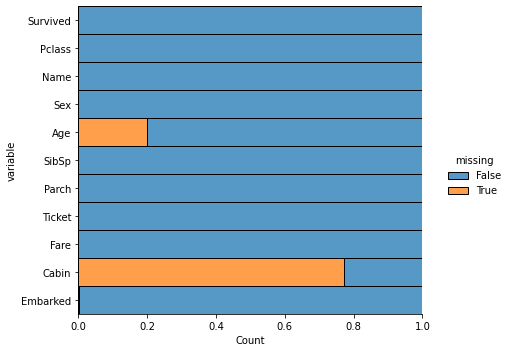

In [10]:
#Computing the proportion of the missing data as a stacked bar plot
plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name='missing'),y='variable',hue='missing', multiple='fill', aspect=1.25)


In [11]:
#Creating a comprehensive list to get better insights of the DataFrame. Identifying the datatypes of the variables

comprehensive=pd.DataFrame(df.dtypes)
comprehensive

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [12]:
#Identifying missing values and adding to the list
comprehensive['MissingValues']= df.isnull().sum()
comprehensive

,0,MissingValues
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [13]:
#Adding the number of unique values. 

comprehensive['UniqueValues']=df.nunique()
comprehensive

,0,MissingValues,UniqueValues
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248
Cabin,object,687,147


In [14]:
#Adding the count for each variable

comprehensive['Count']=df.count()
comprehensive

,0,MissingValues,UniqueValues,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [15]:
#Renaming the column
comprehensive=comprehensive.rename(columns={0:'DataType'})
comprehensive

,DataType,MissingValues,UniqueValues,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


# Univariate and Bivariate Analysis

In [16]:
#List all columns
df.describe().columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
#Separting the numerical and categorical variables
df_num=df[['Age','SibSp','Parch','Fare']]
df_category=df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']] 

### Univariate Analysis

In [18]:
#Normalizing the dataset to get the relative frequency for 'Survived' variable
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

As analysed above, 61% didn't survive while 38% survived.

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

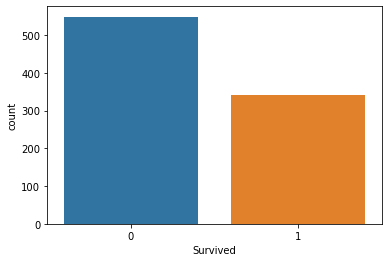

In [19]:
sns.countplot('Survived',data=df)

<AxesSubplot:ylabel='Survived'>

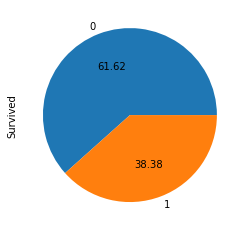

In [24]:
#Stacking the data in a pie chart to decipher the relative percentage
df['Survived'].value_counts().plot(kind='pie', autopct="%.2f")

More passengers died than the ones who survived, furthering our analysis through the graph. 

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

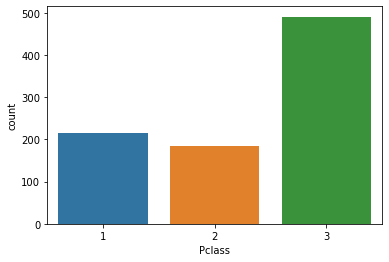

In [20]:
#Getting the compostition of the Pclass variable 
sns.countplot('Pclass',data=df)

<AxesSubplot:ylabel='Pclass'>

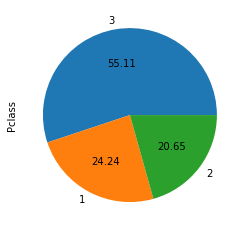

In [26]:
#Getting the percentage composition in a pie chart
df['Pclass'].value_counts().plot(kind='pie', autopct="%.2f")

There are more people with tickets in the lower class category. With the middle class tickets being the 2nd highest and the upper class passengers constituting the lowest percentage. This indicates that passengers with a lower socio-economic status (with a lower ticket bracket) were higher than the other passengers in the ship. 

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

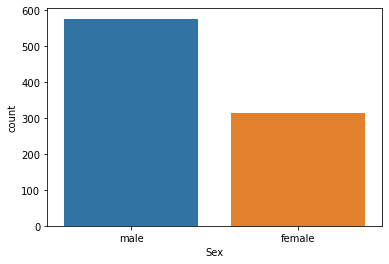

In [21]:
#Getting the compostition of the Sex variable
sns.countplot('Sex',data=df)

<AxesSubplot:ylabel='Sex'>

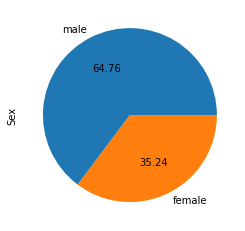

In [23]:
#Getting the percentage composition in a pie chart
df['Sex'].value_counts().plot(kind='pie', autopct="%.2f")

There were a greater percentage of men than women in the ship

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

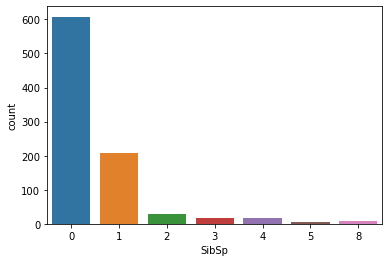

In [50]:
#Getting the compostition of the SibSp variable to get the number of siblings/spouses
sns.countplot('SibSp',data=df)

<AxesSubplot:ylabel='SibSp'>

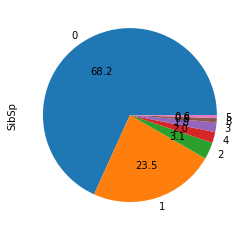

In [30]:
#Getting the percentage composition in a pie chart
df['SibSp'].value_counts().plot(kind='pie', autopct="%.1f")

A greater percentage of passengers in the ship were with no siblings/spouses. While, the rest of the mixture is constituted in the bar graph and pie chart. 

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

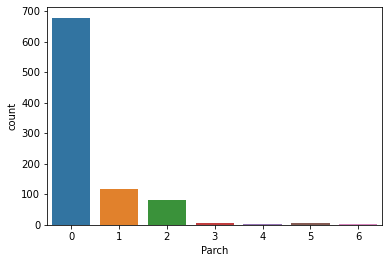

In [51]:
#Getting the compostition of the Parch variable to find the number of parents/chilren aboard
sns.countplot('Parch',data=df)

<AxesSubplot:ylabel='Parch'>

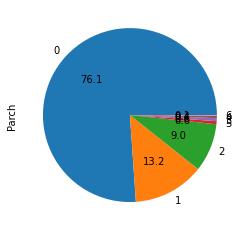

In [31]:
#Getting the percentage composition in a pie chart
df['Parch'].value_counts().plot(kind='pie', autopct="%.1f")

The percentage of passengers with no parents/children is the highest. 

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

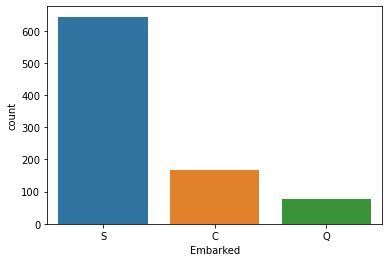

In [52]:
#Getting the details of the composition for the port of the embarkation
sns.countplot('Embarked',data=df)

<AxesSubplot:ylabel='Embarked'>

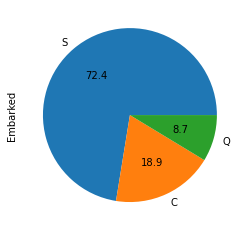

In [32]:
#Getting the percentage of the composition mixture
df['Embarked'].value_counts().plot(kind='pie', autopct="%.1f")

The highest number of embarkations is at Southampton, followed by Cherbourg and Queenstown having the lowest number of embarkations. 

C:\Users\allen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ticket', ylabel='count'>

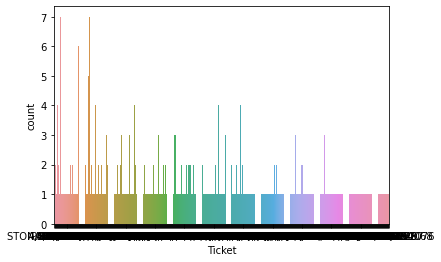

In [33]:
#Getting the details of the composition for tickets
sns.countplot('Ticket',data=df)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

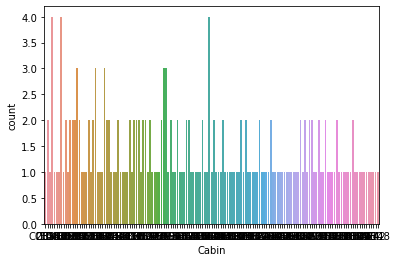

In [35]:
#Getting the details of the composition for cabin details
sns.countplot('Cabin',data=df)

Cabin and Ticket graphs are unintelligible, therefore would require feature engineering

C:\Users\allen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

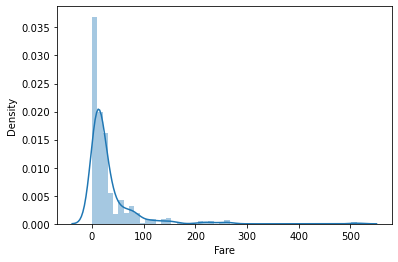

In [53]:
#Getting the distribution of the Fare
sns.distplot(df['Fare'], kde=True)

From the graph it is evident that Fare doesn't follow a normal distribution and is skewed.

C:\Users\allen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

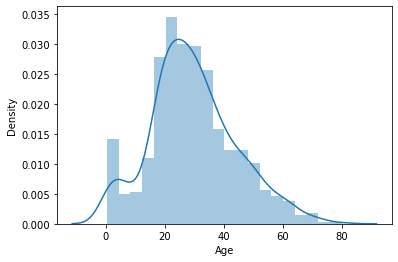

In [54]:
#Getting the distribution for Age
sns.distplot(df['Age'], kde=True)

Age follows a fair normal distribution

### Bivariate Analysis 

In [38]:
#using a pivot table to compare survival across different variables

pd.pivot_table(df, index= 'Survived', values =['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


This shows that 
- People with a younger age have a greater chance of survival
- People who paid more for the tickets have a greater chance of survival
- People with Parents/children have a greater chance of survival
- People with a sibling/partner have a lesser chance of survival

<AxesSubplot:xlabel='Pclass'>

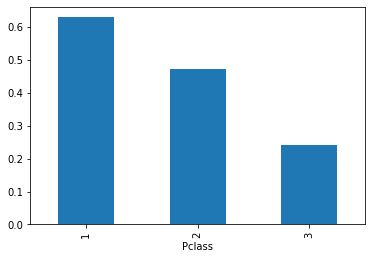

In [40]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

This indicates that Pclass has a strong correlation with survival. Upper class passengers had a greater chance of survival with a 60% survival percentage, the middle class having a 45% survival percentage, while the lower class having the least percentage of survival with a meagre ~23-24%. This indicates that the chance of survival is skewed towards passengers with a greater socio-economic status.  

<AxesSubplot:xlabel='SibSp'>

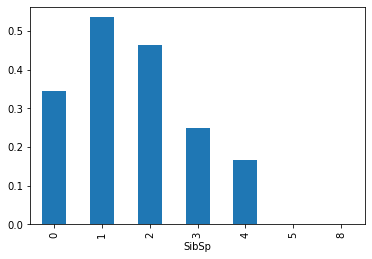

In [56]:
df.groupby('SibSp')['Survived'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Parch'>

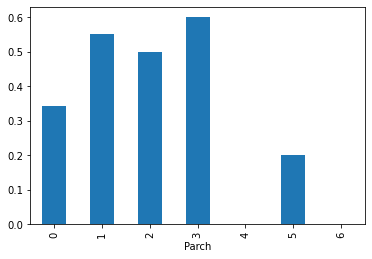

In [57]:
df.groupby('Parch')['Survived'].mean().plot(kind='bar')

This indicates that passengers on board with 3 parents/children had the greatest percentage of survival(~60%), followed closely by passengers with 2 and 1 parent(s)/child(ren). Passengers with 5 parents/children had the least percentage of survival while passengers with 0 children/parent(s) relatively low percentage of survival as well.  

<AxesSubplot:xlabel='Sex'>

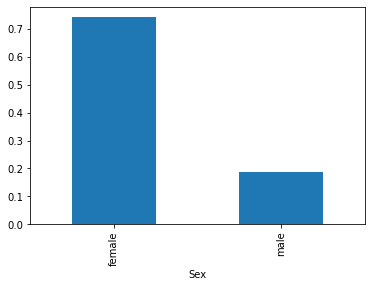

In [58]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

This strongly indicates a strong correlation with the Sex and Survival percentage. The female sex had a greater percentage of survival(75%) compared to male(20%)

<AxesSubplot:xlabel='Embarked'>

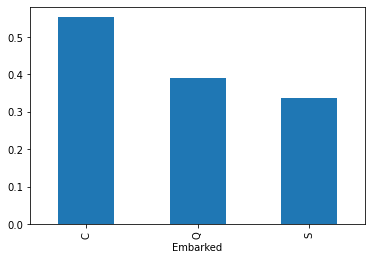

In [59]:
df.groupby('Embarked')['Survived'].mean().plot(kind='bar')

This indicates the port of embarkation at Cherbourg had the highest survival percentage. 

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

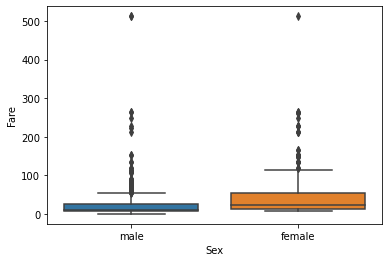

In [47]:
#Display the distribution of Sex wrt Fare
sns.boxplot(x="Sex", y="Fare", data=df)

This indicates female passengers purchased tickets with a higher fare

<AxesSubplot:xlabel='Survived', ylabel='Age'>

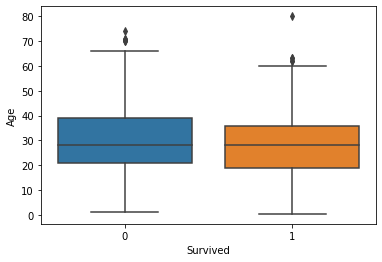

In [60]:
# Display the distribution of Survived wrt Age
sns.boxplot(x="Survived", y="Age", data=df)

The age of the people who didn't survive and the people who did is almost similiar, with the latter having a slighlty younger age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

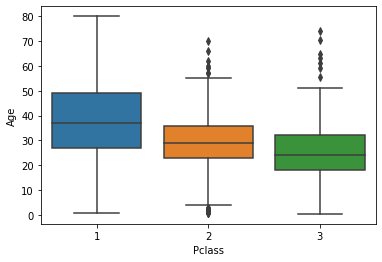

In [49]:
#Display the distribution of Pclass wrt Age
sns.boxplot(x="Pclass", y="Age", data=df)

This indicates upper class passengers are of older age than the rest of the passengers with middle class and lower class socio economic brackets. The lower class passengers have the youngest age bracket. 

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

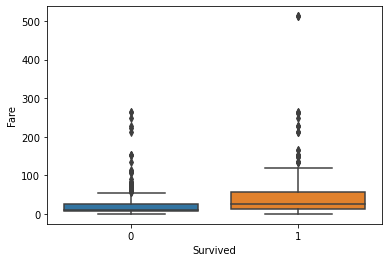

In [61]:
#Display the distribution of Survived wrt Fare
sns.boxplot(x="Survived", y="Fare", data=df)

This indicates passengers who paid a higher fare have a greater chance at survival

In [41]:
#Using pivot table to make comparisons between pclass and survival, and getting the count

print(pd.pivot_table(df, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119



In [43]:
#Using pivot table to make comparisons between sex and survival, and getting the count
print(pd.pivot_table(df, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()


Sex       female  male
Survived              
0             81   468
1            233   109



In [44]:
#Using pivot table to make comparisons between  and survival, and getting the count
print(pd.pivot_table(df, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))
print()

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



# Multivariate Analysis

<AxesSubplot:>

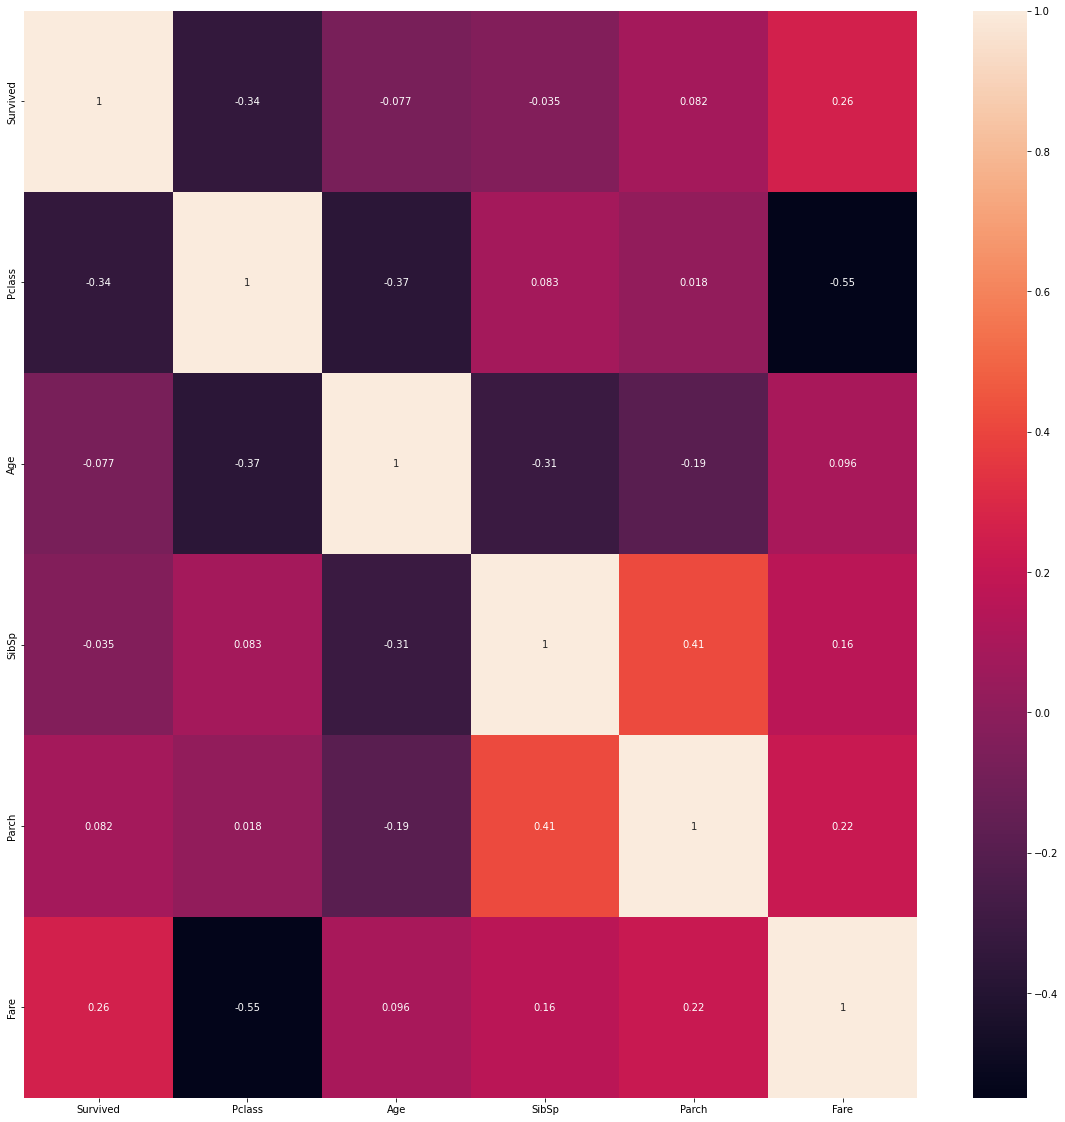

In [45]:
correlations=df.corr()
f, ax= plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

This indicates
- Parch(Parents/children) and SibSp(siblings/parents) have a strong positive correlation. Furthering the analysis that families tend to stick together
- Survived and Fare have a positive correlation, indicating fare of the ticket plays an important role in the chance for survival. 
- There is a strong negative correlation between Survived and PClass, Pclass and age, age and sibsp, fare and Pclass

### Data Cleaning to remove null/missing values

<AxesSubplot:xlabel='Survived', ylabel='Age'>

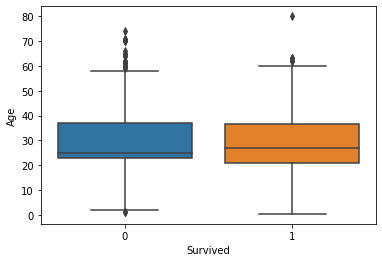

In [55]:
#Getting the boxplot for Survived wrt age to decipher the mean to fill up the missing values in the Age column
sns.boxplot(x="Survived", y="Age", data=df)

Getting the mean values of the ages for passengers who survived as well those who didn't to fill up the missing values. (The mean age for the passengers who didn't survive ~24, while the mean age for the passengers who did ~27)

In [68]:
def assign_value(cols):
    Age=cols[0]
    Survived=cols[1]
    
    if pd.isnull(Age):
        
        if Survived==0:
            return 24
        elif Survived==1:
            return 27
        
    else:
        return Age

Defining a function to get the mean ages for the both the conditions to fill up the missing values

In [69]:
df['Age']=df[['Age','Survived']].apply(assign_value, axis=1)

<AxesSubplot:ylabel='PassengerId'>

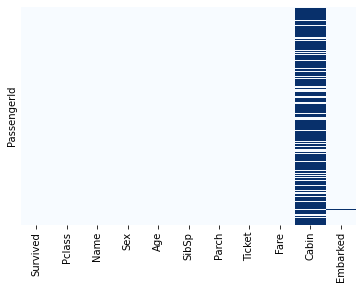

In [70]:
#Getting a heatmap of the columns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='Blues')

The null values in Age column is filled with the assign_value() function

In [71]:
#Dropping the Cabin variable since we are not performing feature engineering here

df.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:ylabel='PassengerId'>

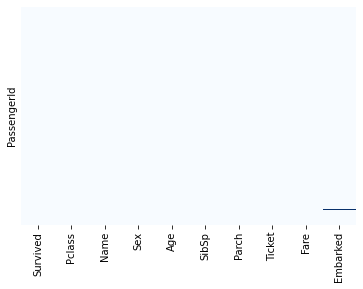

In [54]:
#Getting a heatmap of the missing values in each variables(columns)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='Blues')

### K Means Clustering

In [72]:
#Getting the Age column from the numerical DataFrame as age is the only normalized variable. 
df_age=df_num[['Age']]


In [97]:
#Scaling the data to standard fit the Age feature
scaler=StandardScaler()
df_scaled= scaler.fit_transform(df_age)
df_scaled.shape

(891, 1)

891 rows and 1 feature

In [75]:
df_scaled

array([[-0.53037664],
       [ 0.57183099],
       [-0.25482473],
       [ 0.36516706],
       [ 0.36516706],
       [        nan],
       [ 1.67403863],
       [-1.90813618],
       [-0.18593675],
       [-1.08148046],
       [-1.77036023],
       [ 1.94959054],
       [-0.6681526 ],
       [ 0.64071897],
       [-1.08148046],
       [ 1.74292661],
       [-1.90813618],
       [        nan],
       [ 0.08961515],
       [        nan],
       [ 0.36516706],
       [ 0.29627909],
       [-1.01259248],
       [-0.11704878],
       [-1.49480832],
       [ 0.57183099],
       [        nan],
       [-0.73704057],
       [        nan],
       [        nan],
       [ 0.70960695],
       [        nan],
       [        nan],
       [ 2.50069435],
       [-0.11704878],
       [ 0.8473829 ],
       [        nan],
       [-0.59926462],
       [-0.80592855],
       [-1.08148046],
       [ 0.70960695],
       [-0.18593675],
       [        nan],
       [-1.83924821],
       [-0.73704057],
       [  

In [89]:
df_age.isnull().any().any()

True

In [92]:
#Filling up the missing elements with the mean of the Age Limit
df_age.loc[(df_age['Age'].isnull()==True), 'Age']=df_age['Age'].mean()

C:\Users\allen\AppData\Local\Temp\ipykernel_17984\2294340482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.loc[(df_age['Age'].isnull()==True), 'Age']=df_age['Age'].mean()


In [93]:
df_age.isnull().any().any()

False

In [98]:
# Applying K Means to identify the clusters. Using kmeans.intertia_ we will calculate the distance between each data point and its centroid
accumulator=[]
range_values=range(1,5)
for i in range_values:
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(df_age)
  accumulator.append(kmeans.inertia_)

C:\Users\allen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


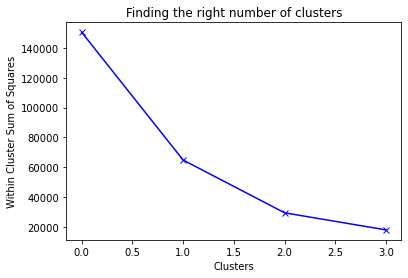

In [114]:
plt.plot(accumulator,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [101]:
kmeans=KMeans(2)
kmeans.fit(df_scaled)
labels=kmeans.labels_

In [102]:
#Getting the labels for the feature
labels

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [103]:
#Getting the shape of the centroid
kmeans.cluster_centers_.shape

(2, 1)

In [104]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_, columns=[df_age.columns])

In [105]:
cluster_centers

,Age
0,-0.399275
1,1.425105


In [106]:
#Inverse Transformation to get the clusters for Age
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers= pd.DataFrame(data= cluster_centers, columns=[df_age.columns])
cluster_centers

,Age
0,24.510652
1,48.217949


In [107]:
labels.shape

(891,)

In [108]:
labels.max()

1

In [109]:
labels.min()

0

In [110]:
#concatenate to identify the cluster to which Age belongs to
df_cluster=pd.concat([df_age, pd.DataFrame({'cluster': labels})], axis=1)
df_cluster.head()

,Age,cluster
1,22.0,1.0
2,38.0,0.0
3,26.0,0.0
4,35.0,0.0
5,35.0,0.0


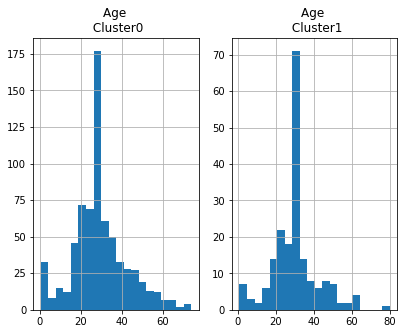

In [116]:
# Plot histogram for clusters
for i in df_age.columns: 
  plt.figure(figsize=(35,5))
  for j in range(2):
    plt.subplot(1,10, j+1)
    cluster= df_cluster[df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
    plt.title('{} \n Cluster{}'.format(i,j))
plt.show()

Age has been grouped into 2 clusters. The distribution for both of them is shown above. 